# Equilibrio líquido de vapor binario (VLE)

Este artigo mostra como preparar o diagrama **Pxy** e **Txy** para mesturas binarias ideais, baseado na **lei de Raoult**, e non ideais, baseado no modelo de coeficiente de actividade de **Wilson**, **NRTL** e **UNIQUAC**.

Para presións baixas a moderadas, o equilibrio líquido de vapor (**VLE**) descríbese mediante a **Lei de Raoult** modificada:
  
$$
y_i P = x_i p_i^{sat}
$$
  
onde, $y_i$ é a fracción molar co compoñente $i$ no vapor, $P$ é a presión do sistema, $x_i$ é a fracción molar do compoñente $i$ no líquido, $\gamma_i$ é o coeficiente de actividade e $P_i^{sat}$ é a presión de vapor para o compoñente $i$ puro.

A presión de vapor calcúlase a partir da **ecuación de Antoine**:
  
$$
ln P_i^{sat} = A_i - B_i /( T + C_i )
$$
  
$A_i$, $B_i$ e $C_i$ son constantes da **ecuación de Antoine** e $T$ é a temperatura á que se debe calcular a presión de vapor.

## Diagrama Txy

O diagrama **Txy** traza as curvas de burbulla e orballo á presión constante $P$. No eixo de abscisas represéntase a fracción mol no líquido do compoñente **1** $x_1$ de 0 a 1. En este caso, tomaremos un incremento de 0.01. Realízase unha iteración para cada fracción molar líquida para estimar a temperatura de equilibrio $T$ e o coeficiente de actividade $\gamma_i$.

### Considerando disolución ideal (lei de Raoult)

A lei de Raoult utilízase para calcular as presións do punto de burbulla e do punto de orballo utilizando os factores $k$:
  
$$
k_i = \frac {y_i} {x_i} = \frac {p_i^{sat}} {P}
$$
  
onde $y_i$ é a fracción molar do compoñente $i$ no vapor ($\sum y_i = 1$), é $x_i$ a fracción molar do compoñente $i$ no líquido ($\sum x_i = 1$) e $P$ é a presión total.

A temperatura de saturación resólvese establecendo $p_i^{sat}$ igual a $P$, e resolvendo para $T$.

A presión do punto de burbulla calcúlase mediante:
  
$$
\sum k_i x_i = 1
$$
  
Polo tanto:
  
$$
P = \sum x_i p_i^{sat}
$$
  
A presión do punto de orballo calcúlase usando:
  
$$
\sum \frac {y_i} {k_i} = 1
$$

Polo que:
  
$$
P = \frac {1} {\sum \frac {x_i} {p_i^{sat}}} 
$$

## Diagrama P-x-y para unha mestura _n-hexano/n-octano_ á temperatura de 115 ºC

In [10]:
from scipy.optimize import brentq

class Species(object):
  
  def __init__(self, name='no name', Psat=lambda T: null):
    self.name = name
    self.Psat = Psat
  
  # alcula a presión de saturación a unha temperatura dada
  def Psat(self, T):
    raise Exception('Psat() non temos datos para o compoñente ' + self.name)
  
  # computa a temperatura de saturación para unha presión dada
  # usamos brentq (función,a,b) onde a e b son os límites do intervalo no que se pretende atopar a solución
  def Tsat(self, P):
    return brentq(lambda T: self.Psat(T) - P, 200, 500)

hexano   = Species('n-hexano', lambda T: 10**(4.00266 - 1171.53  / (T + -48.784)))
octano   = Species('n-octano', lambda T: 10**(4.04867 - 1355.126 / (T + -63.633)))

In [19]:
# Datos da ecuación de Antoine (NIST Webbook)
A = hexano
B = octano

# punutos normais de fervura
for s in [A,B]:
  print('Temperatura normal de fervura de', s.name, ':', round(s.Tsat(1),2), 'K',round(s.Tsat(1) - 273.15,2), 'ou ºC')

Temperatura normal de fervura de n-hexano : 341.47 K 68.32 ou ºC
Temperatura normal de fervura de n-octano : 398.34 K 125.19 ou ºC


In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

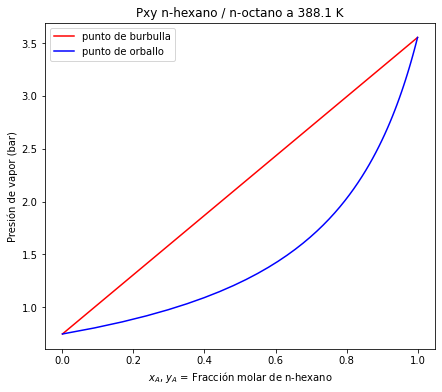

In [45]:
T = 115 + 273.15

def Pxy(A, B, T=0): # , z=0, P=1.5 bar):
    Pp = np.linspace(A.Psat(T), B.Psat(T))
    xA = (Pp - B.Psat(T))/(A.Psat(T) - B.Psat(T))
    yA = xA*A.Psat(T)/Pp
    plt.figure(figsize=(7,6))
    plt.plot(xA, Pp, 'r')
    plt.plot(yA, Pp, 'b')
    plt.xlabel('$x_A$, $y_A$ = Fracción molar de ' + A.name)
    plt.ylabel('Presión de vapor (bar)')
    plt.title('Pxy ' + A.name + ' / ' + B.name + ' a {:.1f} K'.format(T))
    plt.legend(['punto de burbulla', 'punto de orballo'])

Pxy(A, B, T)

## Diagrama Txy a P = 1.5 bar

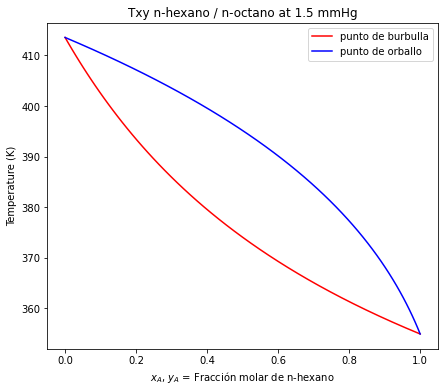

In [44]:
P = 1.5 # bar

import matplotlib.pyplot as plt
import numpy as np

def Txy(A, B, P=760):  #, z=0, T=0):
    Tp = np.linspace(A.Tsat(P), B.Tsat(P))
    xA = (P - B.Psat(Tp))/(A.Psat(Tp) - B.Psat(Tp))
    yA = xA*A.Psat(Tp)/P
    plt.figure(figsize=(7,6))
    plt.plot(xA, Tp, 'r')
    plt.plot(yA, Tp, 'b')
    plt.xlabel('$x_A$, $y_A$ = Fracción molar de ' + A.name)
    plt.ylabel('Temperature (K)')
    plt.title('Txy '+A.name+' / '+B.name+' at {:.1f} mmHg'.format(P))
    plt.legend(['punto de burbulla', 'punto de orballo'])
    
Txy(A, B, P)